In [80]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from numpy import where as IF

In [4]:
# 1. Import claims_data.csv and cust_data.csv which is provided to you and 
combine the two datasets appropriately to create a 360-degree view of 
the data. Use the same for the subsequent questions

SyntaxError: invalid syntax (Temp/ipykernel_2588/786101736.py, line 2)

In [6]:
claims = pd.read_csv('claims.csv')
claims

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No
...,...,...,...,...,...,...,...,...,...,...
1095,97727122,35951012,Other driver error,06/11/2017,Auto,No,Material only,$3059,4.0,Yes
1096,10247193,14818669,Natural causes,03/14/2018,Auto,No,Material only,$1520,2.0,No
1097,79807493,85322831,Other driver error,02/09/2018,Auto,No,Material and injury,$23575,2.0,Yes
1098,69299345,73449366,Other causes,03/21/2018,Auto,Unknown,Material and injury,$25120,1.0,No


In [7]:
claims.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No


In [8]:
demo = pd.read_csv('cust_demographics.csv')
demo

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold
...,...,...,...,...,...,...
1080,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum
1081,42364152,Female,07-Jul-96,ID,529-462-1635,Silver
1082,19888166,Male,11-Apr-90,WI,712-651-9613,Gold
1083,11256802,Female,22-Oct-64,LA,469-345-5617,Silver


In [9]:
demo.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold


In [10]:
comb_df = pd.merge(right = claims,
                   left = demo, 
                   right_on = "customer_id", 
                   left_on = "CUST_ID",
                   how = "outer"
                  )
comb_df.drop(columns = ["customer_id"], inplace = True)
comb_df.head(2)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593.0,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764.0,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424.0,Female,13-Jan-70,ME,265-543-1264,Silver,33985796.0,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No


In [11]:
comb_df.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593.0,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764.0,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424.0,Female,13-Jan-70,ME,265-543-1264,Silver,33985796.0,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver,53522022.0,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver,63017412.0,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No
4,47830476.0,Female,01-May-86,MA,413-187-7945,Silver,13015401.0,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No


In [12]:
# 2. Perform a data audit for the datatypes and find out if there are any 
mismatch within the current datatypes of the columns and their 
business significance

# 3 Convert the column claim_amount to numeric. Use the appropriate 
modules/attributes to remove the $ sign.


SyntaxError: invalid syntax (Temp/ipykernel_2588/3738224724.py, line 2)

In [13]:
comb_df["DateOfBirth"] = pd.to_datetime(comb_df.DateOfBirth, format = "%d-%b-%y")
comb_df.loc[(comb_df.DateOfBirth.dt.year > 2020),"DateOfBirth"]=comb_df[comb_df.DateOfBirth.dt.year > 2020]["DateOfBirth"].apply(lambda x: x - pd.DateOffset(years=100))
comb_df["claim_date"] = pd.to_datetime(comb_df.claim_date, format = "%m/%d/%Y")
comb_df["Contact"] = pd.to_numeric(comb_df.Contact.str.replace("-",""),downcast='float')
comb_df["claim_amount"] = pd.to_numeric(comb_df.claim_amount.str.replace("$",""),downcast='float')

C:\Users\avita\AppData\Local\Temp/ipykernel_2588/3777508955.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  comb_df["claim_amount"] = pd.to_numeric(comb_df.claim_amount.str.replace("$",""),downcast='float')


In [14]:
comb_df.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593.0,Female,1979-01-12,VT,7.899168e+09,Platinum,54004764.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No
1,75740424.0,Female,1970-01-13,ME,2.655431e+09,Silver,33985796.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No
2,30308357.0,Female,1984-03-11,TN,7.986315e+09,Silver,53522022.0,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes
3,30308357.0,Female,1984-03-11,TN,7.986315e+09,Silver,63017412.0,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No
4,47830476.0,Female,1986-05-01,MA,4.131878e+09,Silver,13015401.0,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No


In [15]:
# 4. Of all the injury claims, some of them have gone unreported with the 
police. Create an alert flag (1,0) for all such claims.


SyntaxError: invalid syntax (Temp/ipykernel_2588/2764775737.py, line 2)

In [16]:
comb_df["flag"] = IF(comb_df.police_report == "No", 0 ,
                    IF(comb_df.police_report == "Yes", 1, np.nan))
comb_df.drop(columns = ["police_report"], inplace = True)

In [17]:
# 5. One customer can claim for insurance more than once and in each claim,
multiple categories of claims can be involved. However, customer ID 
should remain unique. 
Retain the most recent observation and delete any duplicated records in
the data based on the customer ID column.

SyntaxError: invalid syntax (Temp/ipykernel_2588/3543621203.py, line 2)

In [18]:
comb_df = comb_df.groupby('CUST_ID').first().reset_index(drop = True)

In [19]:
comb_df.head()

,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,flag
0,Female,1978-05-23,DE,9.628791e+09,Platinum,69348631.0,Driver error,2018-04-10,Auto,Injury only,NaN,1.0,Yes,0.0
1,Male,1972-12-20,TX,1.738926e+09,Silver,40953049.0,Other causes,2018-04-04,Auto,Material and injury,39192.0,1.0,Yes,0.0
2,Male,1988-07-28,FL,3.645981e+09,Silver,45780237.0,Natural causes,2017-10-17,Auto,Material only,1621.5,2.0,Yes,NaN
3,Male,1971-08-19,CA,1.873488e+09,Gold,89833962.0,Other causes,2018-03-21,Auto,Material and injury,37040.0,1.0,No,1.0
4,Female,1980-08-10,NC,7.988625e+09,Gold,35782742.0,Other driver error,2018-07-27,Auto,Injury only,35250.0,3.0,No,0.0


In [20]:
# 6. Check for missing values and impute the missing values with an 
appropriate value. (mean for continuous and mode for categorical)

SyntaxError: invalid syntax (Temp/ipykernel_2588/3395795220.py, line 2)

In [21]:
comb_df["incident_cause"].isna().sum()

7

In [22]:
cat_col = ["gender","State","Segment","incident_cause","claim_area","claim_type","fraudulent","flag"]
con_col = ["claim_amount"]

In [23]:
for col in cat_col:
    comb_df[col] = comb_df[col].fillna(comb_df[col].mode()[0])
comb_df[con_col] = comb_df[con_col].fillna(comb_df[con_col].mean())
comb_df.head()

,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,flag
0,Female,1978-05-23,DE,9.628791e+09,Platinum,69348631.0,Driver error,2018-04-10,Auto,Injury only,12470.501953,1.0,Yes,0.0
1,Male,1972-12-20,TX,1.738926e+09,Silver,40953049.0,Other causes,2018-04-04,Auto,Material and injury,39192.000000,1.0,Yes,0.0
2,Male,1988-07-28,FL,3.645981e+09,Silver,45780237.0,Natural causes,2017-10-17,Auto,Material only,1621.500000,2.0,Yes,0.0
3,Male,1971-08-19,CA,1.873488e+09,Gold,89833962.0,Other causes,2018-03-21,Auto,Material and injury,37040.000000,1.0,No,1.0
4,Female,1980-08-10,NC,7.988625e+09,Gold,35782742.0,Other driver error,2018-07-27,Auto,Injury only,35250.000000,3.0,No,0.0


In [24]:
# 7. Calculate the age of customers in years. Based on the age, categorize the
customers according to the below criteria
Children < 18
Youth 18-30
Adult 30-60
Senior > 60

SyntaxError: invalid syntax (Temp/ipykernel_2588/497209512.py, line 2)

In [25]:
comb_df["Age"] = round((comb_df.claim_date - comb_df.DateOfBirth).apply(lambda x: x.days)/365.25, 2)

In [26]:
comb_df["Age_grp"] = IF(comb_df.Age < 18, "Children",
                        IF(comb_df.Age < 30, "Youth",
                         IF(comb_df.Age < 60, "Adult",
                          IF(comb_df.Age < 100, "Senior", "NaN"
                           
                          )
                         )
                        )
                       )
comb_df["Age_grp"] = comb_df["Age_grp"].fillna(comb_df["Age_grp"].mode())
comb_df.groupby(by = "Age_grp").count()

,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,flag,Age
Age_grp,,,,,,,,,,,,,,,
Adult,744,744,744,744,744,744,744,744,744,744,744,736,744,744,744
Children,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
NaN,7,7,7,7,7,0,7,0,7,7,7,0,7,7,0
Youth,326,326,326,326,326,326,326,326,326,326,326,324,326,326,326


In [27]:
# 8. What is the average amount claimed by the customers from various 
segments?


Object `segments` not found.


In [28]:
comb_df.groupby(by = "Segment")[["claim_amount"]].mean()

,claim_amount
Segment,
Gold,12755.710938
Platinum,12370.138672
Silver,12271.163086


In [29]:
 # 9. What is the total claim amount based on incident cause for all the claims
that have been done at least 20 days prior to 1st of October, 2018.

SyntaxError: invalid syntax (Temp/ipykernel_2588/3184645141.py, line 2)

In [30]:
comb_df.loc[comb_df.claim_date < "2018-09-10",:].groupby("incident_cause")["claim_amount"].sum().add_prefix("total_")

incident_cause
total_Crime                  724462.5
total_Driver error          3264286.0
total_Natural causes        1312706.0
total_Other causes          3725038.5
total_Other driver error    3318806.5
Name: claim_amount, dtype: float32

In [31]:
# 10. How many adults from TX, DE and AK claimed insurance for driver 
related issues and causes? 

SyntaxError: invalid syntax (Temp/ipykernel_2588/3527791413.py, line 2)

In [32]:
comb_df.loc[(comb_df.incident_cause.str.lower().str.contains("driver") 
             & ((comb_df.State == "TX") | (comb_df.State == "DE") | (comb_df.State == "AK"))),:].groupby(by = "State")["State"].count()

State
AK    10
DE    15
TX    10
Name: State, dtype: int64

In [33]:
# 11. Draw a pie chart between the aggregated value of claim amount based 
on gender and segment. Represent the claim amount as a percentage on
the pie chart.

SyntaxError: invalid syntax (Temp/ipykernel_2588/2262160433.py, line 2)

In [34]:
f1 = comb_df.groupby(by = ["gender","Segment"])["claim_amount"].sum().reset_index()
f1.head()

,gender,Segment,claim_amount
0,Female,Gold,2122234.0
1,Female,Platinum,2381974.0
2,Female,Silver,1935970.0
3,Male,Gold,2622890.5
4,Male,Platinum,2120756.5


In [35]:
res = f1.pivot(index = "Segment", columns = "gender", values = "claim_amount")
res

gender,Female,Male
Segment,,
Gold,2122234.0,2622890.5
Platinum,2381974.0,2120756.5
Silver,1935970.0,2346666.0


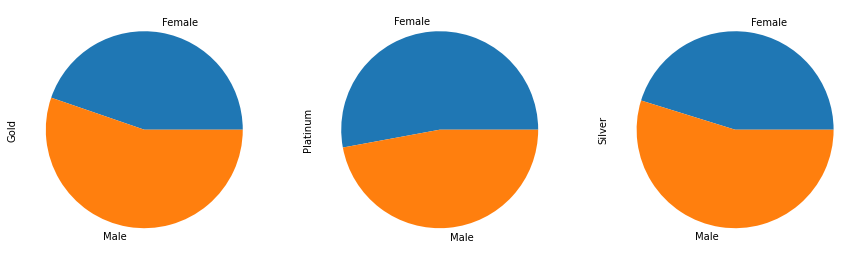

In [36]:
res.T.plot(kind = "pie", subplots = True, legend = False, figsize = (15,8))
plt.show()


In [37]:
# 12. Among males and females, which gender had claimed the most for any 
type of driver related issues? E.g. This metric can be compared using a 
bar chart

SyntaxError: invalid syntax (Temp/ipykernel_2588/1888605245.py, line 2)

In [38]:
f2 = comb_df.loc[(comb_df.incident_cause.str.lower().str.contains("driver"))].groupby(by = "gender")[["gender"]].count().add_prefix("CountOf_").reset_index()
f2

,gender,CountOf_gender
0,Female,221
1,Male,280


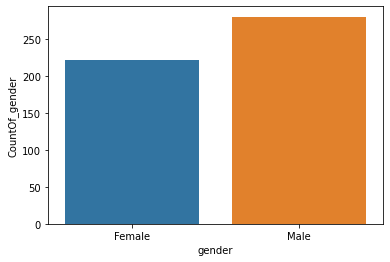

In [39]:
sns.barplot(x = "gender", y = "CountOf_gender", data = f2 )
plt.show()

In [40]:
# 13. Which age group had the maximum fraudulent policy claims? Visualize 
it on a bar chart.


SyntaxError: invalid syntax (Temp/ipykernel_2588/2043117988.py, line 2)

In [41]:
comb_df.head()

,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,flag,Age,Age_grp
0,Female,1978-05-23,DE,9.628791e+09,Platinum,69348631.0,Driver error,2018-04-10,Auto,Injury only,12470.501953,1.0,Yes,0.0,39.88,Adult
1,Male,1972-12-20,TX,1.738926e+09,Silver,40953049.0,Other causes,2018-04-04,Auto,Material and injury,39192.000000,1.0,Yes,0.0,45.29,Adult
2,Male,1988-07-28,FL,3.645981e+09,Silver,45780237.0,Natural causes,2017-10-17,Auto,Material only,1621.500000,2.0,Yes,0.0,29.22,Youth
3,Male,1971-08-19,CA,1.873488e+09,Gold,89833962.0,Other causes,2018-03-21,Auto,Material and injury,37040.000000,1.0,No,1.0,46.59,Adult
4,Female,1980-08-10,NC,7.988625e+09,Gold,35782742.0,Other driver error,2018-07-27,Auto,Injury only,35250.000000,3.0,No,0.0,37.96,Adult


In [42]:
comb_df.groupby(by = "Age_grp")[["fraudulent"]].count()

,fraudulent
Age_grp,
Adult,744
Children,8
NaN,7
Youth,326


In [43]:
comb_df[(comb_df.Age_grp == np.nan)]

,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,flag,Age,Age_grp


In [44]:
val = comb_df['Age_grp'].mode()[0]
print(val)
comb_df.loc[:,"Age_grp"] = comb_df.loc[:,'Age_grp'].fillna(value = val)

Adult


In [45]:
# 14. Visualize the monthly trend of the total amount that has been claimed 
by the customers. Ensure that on the “month” axis, the month is in a 
chronological order not alphabetical order.

SyntaxError: invalid syntax (Temp/ipykernel_2588/1272766067.py, line 2)

In [48]:
comb_df['claim_dt'] = pd.to_datetime(comb_df['claim_date'])
comb_df['Month_of_claim'] = comb_df['claim_dt'].dt.month

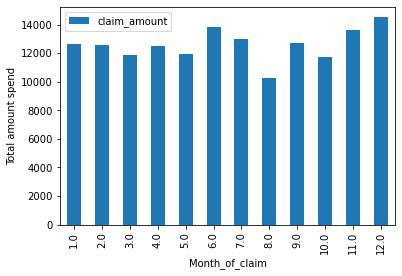

In [49]:
pd.pivot_table(comb_df,index="Month_of_claim",values="claim_amount").plot(kind='bar')
plt.ylabel('Total amount spend')
plt.show()

In [ ]:
# 15. What is the average claim amount for gender and age categories and 
suitably represent the above using a facetted bar chart, one facet that 
represents fraudulent claims and the other for non-fraudulent claims

In [50]:
Frauds_amount_gender= pd.DataFrame(comb_df.loc[(comb_df.fraudulent=="Yes")].groupby(["gender","Age_grp"])[["claim_amount"]].mean().add_prefix("Fraud_"))
Non_Frauds_amount_gender=pd.DataFrame(comb_df.loc[(comb_df.fraudulent=="No")].groupby(["gender","Age_grp"])[["claim_amount"]].mean().add_prefix("Non_Fraud_"))

In [51]:
Claims_age_gender=round(pd.merge(Frauds_amount_gender,Non_Frauds_amount_gender, on=["gender","Age_grp"]),2)

In [52]:
Claims_age_gender

Fraud_claim_amount  Non_Fraud_claim_amount
gender Age_grp                                             
Female Adult           12462.080078            12494.320312
       Youth            7599.120117            12300.639648
Male   Adult           17062.199219            12091.990234
       Children        32407.000000            18316.000000
       Youth           10096.429688            12193.259766

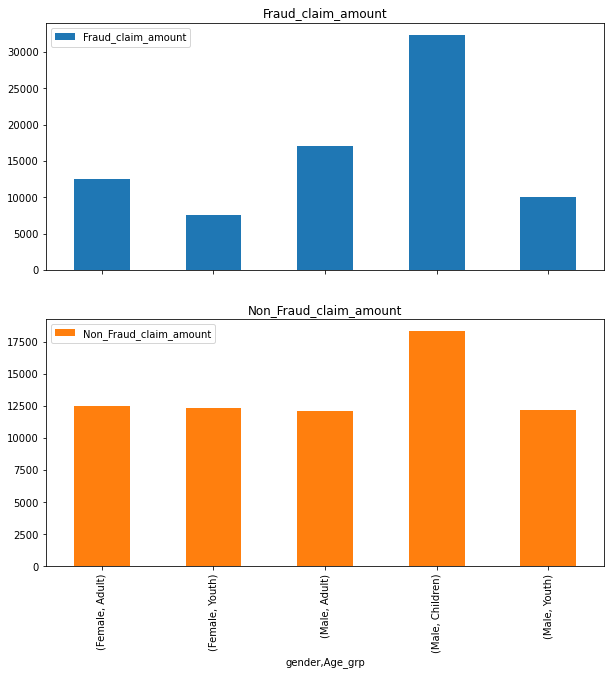

In [53]:
Claims_age_gender.plot(kind="bar", subplots= True, legend= True,figsize=(10,10))
plt.show()

In [ ]:
# 16. Is there any similarity in the amount claimed by males and females?

In [55]:
claim_male = comb_df['claim_amount'].loc[comb_df['gender']=="Male"]
claim_female = comb_df['claim_amount'].loc[comb_df['gender']=="Female"]

In [58]:
claim_male.mean()

12821.54296875

In [59]:
claim_female.mean()

12105.59765625

In [60]:
import scipy.stats as stats

In [61]:
# equal varience
eq_var = stats.ttest_ind(a= claim_male,
                b= claim_female,
                equal_var=True)
eq_var.statistic

0.884820659484728

In [63]:
# UnEqual variance
uneq_var = stats.ttest_ind(a= claim_male,
                b= claim_female,
                equal_var=False)
uneq_var.statistic

0.8854215435845393

In [ ]:
#  17. Is there any relationship between age category and segment?

In [65]:
agecat_seg = pd.crosstab(comb_df.Age_grp, comb_df.Segment, margins = True)
agecat_seg

Segment,Gold,Platinum,Silver,All
Age_grp,,,,
Adult,262,241,241,744
Children,4,4,0,8
NaN,1,3,3,7
Youth,105,116,105,326
All,372,364,349,1085


In [68]:
Chi_test = stats.chi2_contingency(observed= agecat_seg)
Chi_test


(6.349304779939779,
 0.8974603505178772,
 12,
 array([[ 255.08571429,  249.6       ,  239.31428571,  744.        ],
        [   2.74285714,    2.68387097,    2.57327189,    8.        ],
        [   2.4       ,    2.3483871 ,    2.2516129 ,    7.        ],
        [ 111.77142857,  109.36774194,  104.86082949,  326.        ],
        [ 372.        ,  364.        ,  349.        , 1085.        ]]))

In [69]:
print("The chi square stat is {} and the p value is {}".format(Chi_test[0],Chi_test[1]))

The chi square stat is 6.349304779939779 and the p value is 0.8974603505178772


In [ ]:
# 18. The current year has shown a significant rise in claim amounts as 
compared to 2016-17 fiscal average which was $10,000

In [72]:
comb_df["Year"]= comb_df['claim_dt'].dt.year



In [73]:
comb_df["Year"].value_counts()

2017.0    597
2018.0    481
Name: Year, dtype: int64

In [75]:
Current_year= comb_df.loc[comb_df.Year == 2018]["claim_amount"]
amt_2016_17= comb_df.loc[comb_df.Year==2017]["claim_amount"]

In [76]:
# pearson coeffecient
stats.pearsonr(Current_year,amt_2016_17)

ValueError: x and y must have the same length.

In [ ]:
# 19. Is there any difference between age groups and insurance claims?
 #20. Is there any relationship between total number of policy claims and the 
claimed amount?
AnalytixLabs, Website: www.analytixlabs.co.in Email: info@analytixlabs.co.inPhone: (+91) 955.521.900

In [78]:
comb_df['total_policy_claims'] = pd.to_numeric(comb_df['total_policy_claims'])

In [79]:
# #Correlation
comb_df.total_policy_claims.corr(other= comb_df.claim_amount)



-0.014369036618012743

Correlation is negative
